In [1]:
import warnings
warnings.filterwarnings('ignore')

#  1.- Small Circle inside Large Circle


**a)** Escriba una función que genere (aleatoriamente) $n$ datos etiquetados de la forma $\{(x_1; y_1), ... ,(x_n; y_n)\}, x_i \in R^2, y_i \in \{0, 1\}$, con una distribución de probabilidad que refleje la configuración linealmente inseparable que muestra la Fig. 1. Utilice esta función para crear 1000 datos de entrenamiento y 1000 datos de pruebas. Para medir la tendencia de los modelos a sobre-ajuste, agregue un 5% de ruido al dataset, generando x's cercanos a la frontera. Genere un gráfico que muestre datos de entrenamiento y pruebas, identificando cada clase con un color diferente.

In [68]:
import numpy as np
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(8)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),
                   np.append(outer_circ_y, inner_circ_y))).T
    
    y = np.hstack([np.zeros(n // 2, dtype=np.intp),
                   np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    return X_train,y_train,X_test,y_test

X_train,Y_train,X_test,Y_test = do_circles()

Para lo que sigue de la actividad utilice la siguiente función para graficar las fronteras de clasificación en
base a la probabilidad, definida por un algoritmo, de un ejemplo a pertenecer a una clase en particular.

In [122]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
  f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
  axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
  axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
  XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
  if model_type == 'DecisionTree':
      Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
  else:
      Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
  Z = Z.reshape(XX.shape)
  Zplot = Z >= 0.5
  axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
  axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],
  levels=[-2, 0, 2])
  plt.show()

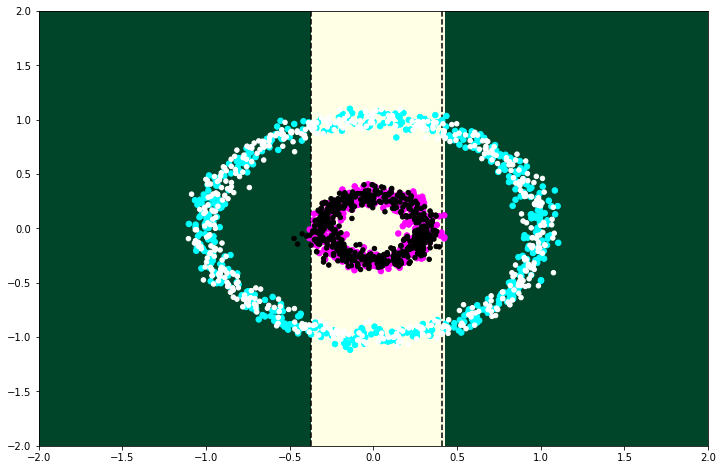

In [70]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
Tree.fit(X_train, Y_train)
plot_classifier(Tree,X_train,Y_train,X_test,Y_test,"DecisionTree")

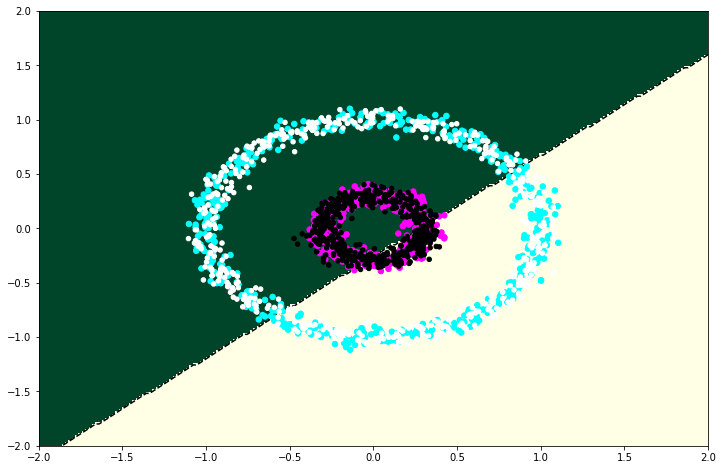

In [71]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=100, penalty='l2', tol=0.01)
LR.fit(X_train, Y_train)
plot_classifier(LR,X_train,Y_train,X_test,Y_test,"Logistic Regression")

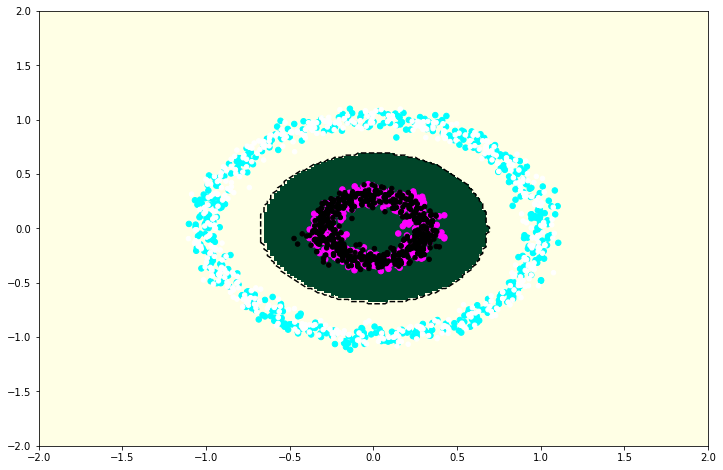

In [72]:
from sklearn.svm import SVC as SVM
model_SVM = SVM(kernel='rbf')
model_SVM.fit(X_train,Y_train)
plot_classifier(model_SVM,X_train,Y_train,X_test,Y_test,"SVM")

**b)** Demuestre __experimentalmente__ que una red neuronal artificial correspondiente a 1 sola neurona (i.e. sin capas escondidas) no puede resolver satisfactoriamente el problema. Puede utilizar la función de activación y el método de entrenamiento que prefiera. Sea convincente: por ejemplo, intente modificar los parámetros de la máquina de aprendizaje, reportando métricas que permitan evaluar el desempeño del modelo en el problema con cada cambio efectuado. Adapte también la función plot classifier para que represente gráficamente la solución encontrada por la red neuronal. Describa y explique lo que observa, reportando gráficos de la solución sólo para algunos casos representativos.

In [123]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,RMSprop,Adam,Adagrad

def train_models():
    activ = ['sigmoid','relu','softmax']
    opti = [SGD,RMSprop,Adam]
    clipn = [0.7,1.0]
    clipv = [0.7,1.0]
    n_h=1
    total = len(activ)*len(opti)*len(clipn)*len(clipv)
    actual = 0
    scores = []
    for a in activ:
        for o in opti:
            for cn in clipn:
                for cv in clipv:
                    actual+=1
                    print("Training %d/%d"%(actual,total))
                    model = Sequential()
                    model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
                    model.add(Dense(1, init='uniform', activation=a))
                    model.compile(optimizer=o(lr=1, clipnorm=cn, clipvalue=cv), loss="binary_crossentropy", metrics=["accuracy"])
                    
                    train = model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=0)
                    train_scores = model.evaluate(X_train, Y_train)
                    test_scores = model.evaluate(X_test, Y_test)
                    scores.append((model,train_scores,test_scores))
                    print(model,train_scores,test_scores)
    return scores

scores = train_models()

Training 1/36
1000/1000 [==============================] - 0s 226us/step
<keras.models.Sequential object at 0x7fe21e610780> [0.53859006500244144, 0.69899999999999995] [0.56348790597915654, 0.66600000000000004]
Training 2/36
1000/1000 [==============================] - 0s 166us/step
<keras.models.Sequential object at 0x7fe21e5e9518> [0.55805632400512695, 0.67900000000000005] [0.54124674797058103, 0.68899999999999995]
Training 3/36
1000/1000 [==============================] - 0s 195us/step
<keras.models.Sequential object at 0x7fe21e0a0208> [0.56253340244293215, 0.67600000000000005] [0.53559892845153811, 0.69899999999999995]
Training 4/36
1000/1000 [==============================] - 0s 210us/step
<keras.models.Sequential object at 0x7fe21ddad1d0> [0.53823539447784419, 0.70299999999999996] [0.56382634162902834, 0.66700000000000004]
Training 5/36
1000/1000 [==============================] - 0s 162us/step
<keras.models.Sequential object at 0x7fe21dae3e10> [0.58483670473098759, 0.492999999999

1000/1000 [==============================] - 0s 134us/step
<keras.models.Sequential object at 0x7fe217f62fd0> [7.8595956602096555, 0.50700000000000001] [8.0827890396118161, 0.49299999999999999]
Training 33/36
1000/1000 [==============================] - 0s 214us/step
<keras.models.Sequential object at 0x7fe21799af60> [7.8595956602096555, 0.50700000000000001] [8.0827890396118161, 0.49299999999999999]
Training 34/36
1000/1000 [==============================] - 0s 225us/step
<keras.models.Sequential object at 0x7fe217898e80> [7.8595956602096555, 0.50700000000000001] [8.0827890396118161, 0.49299999999999999]
Training 35/36
1000/1000 [==============================] - 0s 275us/step
<keras.models.Sequential object at 0x7fe217218048> [7.8595956602096555, 0.50700000000000001] [8.0827890396118161, 0.49299999999999999]
Training 36/36
1000/1000 [==============================] - 0s 205us/step
<keras.models.Sequential object at 0x7fe2171b9dd8> [7.8595956602096555, 0.50700000000000001] [8.082789039

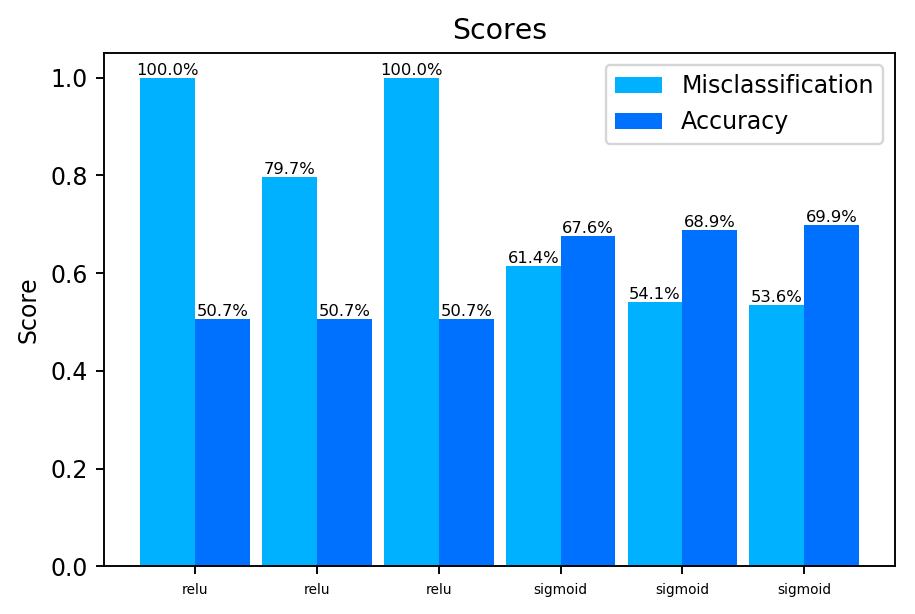

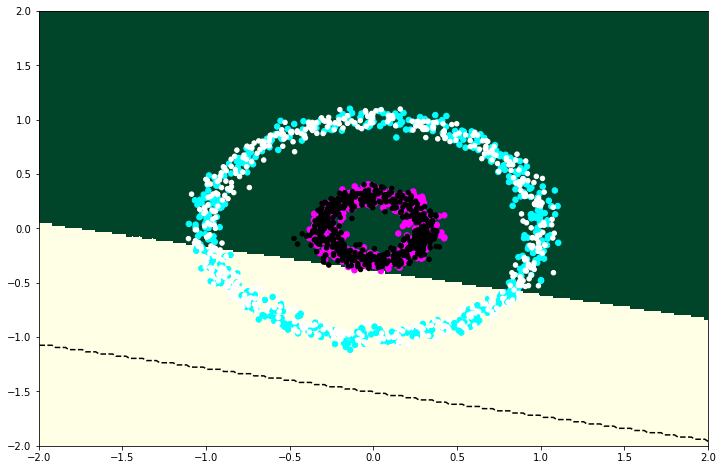

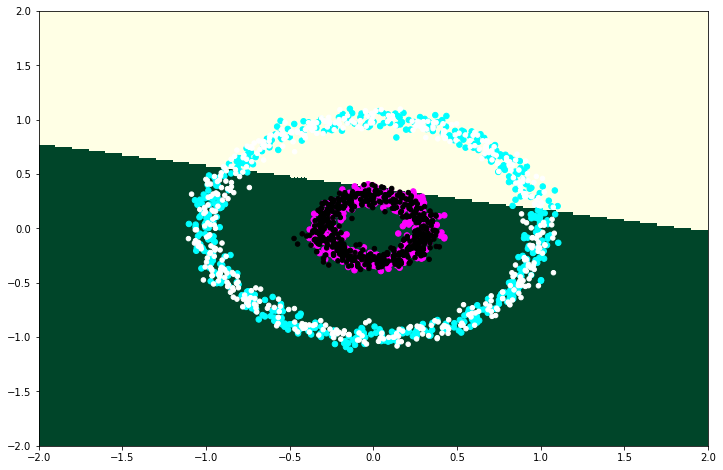

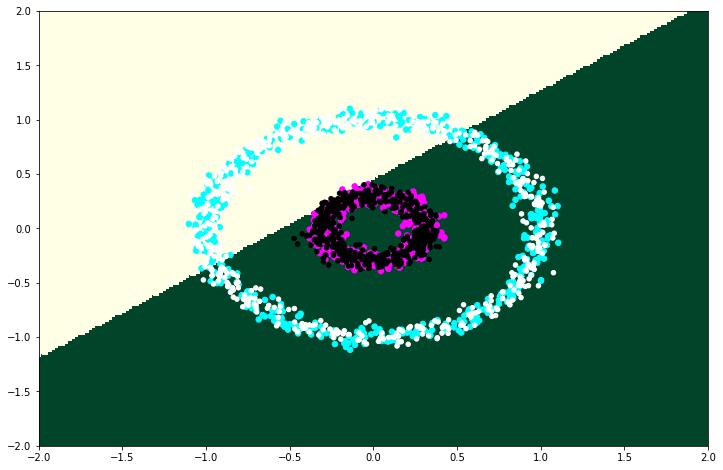

In [165]:
def plot_scores(scores,n=3,title="Scores"):
    count = len(scores)
    models = []
    # for x in scores[:n]: models.append(x) 
    for x in scores[int(count/2):int(count/2)+n]: models.append(x) 
    for x in scores[-n:]: models.append(x) 
    
    N = len(models)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.45         # the width of the bars

    fig, ax = plt.subplots()

    test_miss = list(min([m[2][0],1]) for m in models)
    test_acc = list(m[2][1] for m in models)

    rects1 = ax.bar(ind, test_miss, width, color='#00b1ff')
    rects1b = ax.bar(ind+width, test_acc, width, color='#0070ff')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(ind + width/2)
    ax.set_xticklabels((m[0].get_config()[1]['config']['activation'] for m in models),fontsize='xx-small')

    ax.legend((rects1[0], rects1b[0]), ('Misclassification', 'Accuracy'), loc='upper right')


    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., height,
                    '%.1f%%' % (100*height),
                    ha='center', va='bottom', fontsize='x-small')

    autolabel(rects1)
    autolabel(rects1b)
    fig.set_dpi(170)

    plt.show()
    
    for m in models[-n:]:
        plot_classifier(m[0],X_train,Y_train,X_test,Y_test,"Sequential")
    
scores = sorted(scores, key=(lambda x: x[2][1]), reverse=False)
plot_scores(scores)

Los gráficos muestran las 3 clasificaciones de en medio y las 3 mejores.

Como se puede ver en éstos gráficos de los modelos generados, todas las clasificaciones realizadas fueron separaciones lineales y como fue demostrado anteriormente, este problema no puede ser resuelto utilizando estas técnicas.

**c)** Demuestre **experimentalmente** que una red neuronal artificial con 1 capa escondida puede resolver satisfactoriamente el problema obtenido en a). Puede utilizar la arquitectura y el método de entrenamiento
que prefiera, pero en esta actividad puede optar tranquilamente por usar los hiper-parámetros que se entregan como referencia en el código de ejemplo. Cambie el número de neuronas Nh en la red entre 2 y 32 en potencias de 2, graficando el error de entrenamiento y pruebas como función de Nh. Describa y explique lo que observa. Utilice la función *plot_classifier*, diseñada anteriormente, para construir gráficos de la solución en algunos casos representativos.

In [162]:
def train_models_nh():
    activ = ['sigmoid','relu']
    opti = [SGD,RMSprop]
    n_h = [2,4,8,16,32]
    total = len(activ)*len(opti)*len(n_h)
    actual = 0
    scores = []
    for a in activ:
        for o in opti:
            for h in n_h:
                actual+=1
                print("Training %d/%d"%(actual,total))
                model = Sequential()
                model.add(Dense(h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
                model.add(Dense(1, init='uniform', activation=a))
                model.compile(optimizer=o(lr=1), loss="binary_crossentropy", metrics=["accuracy"])

                train = model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=0)
                train_scores = model.evaluate(X_train, Y_train)
                test_scores = model.evaluate(X_test, Y_test)
                scores.append((model,train_scores,test_scores))
                print(model,train_scores,test_scores)
    return scores

scores_nh = train_models_nh()

Training 1/20
1000/1000 [==============================] - 0s 192us/step
<keras.models.Sequential object at 0x7fe20e5ee160> [0.30261527132987975, 0.88300000000000001] [0.35863543915748597, 0.85299999999999998]
Training 2/20
1000/1000 [==============================] - 0s 188us/step
<keras.models.Sequential object at 0x7fe20e3ae7f0> [0.010941107347607613, 1.0] [0.012766901567578317, 1.0]
Training 3/20
1000/1000 [==============================] - 0s 185us/step
<keras.models.Sequential object at 0x7fe20e3b4fd0> [0.0050199585966765881, 1.0] [0.0052541773542761801, 1.0]
Training 4/20
1000/1000 [==============================] - 0s 189us/step
<keras.models.Sequential object at 0x7fe20eeb1be0> [0.0046347049251198764, 1.0] [0.0049549427852034564, 1.0]
Training 5/20
1000/1000 [==============================] - 0s 238us/step
<keras.models.Sequential object at 0x7fe20de1ff98> [0.0044973218590021137, 1.0] [0.0048247137367725375, 1.0]
Training 6/20
1000/1000 [==============================] - 0s 17

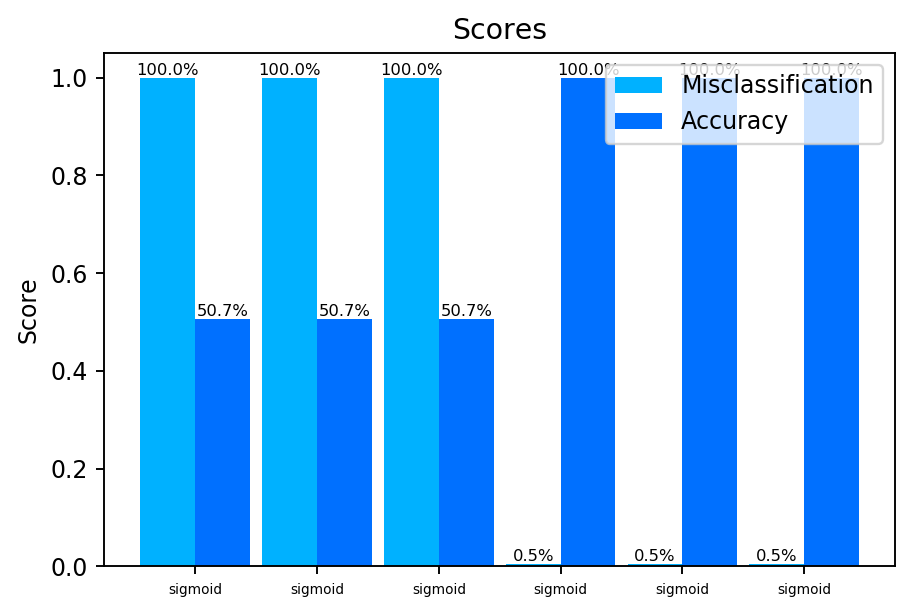

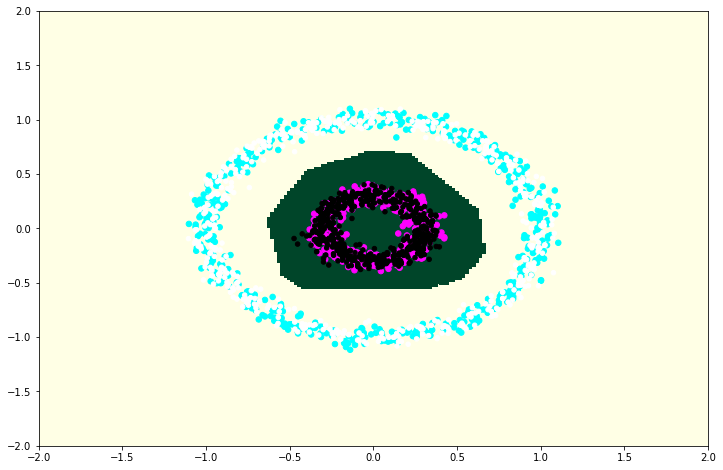

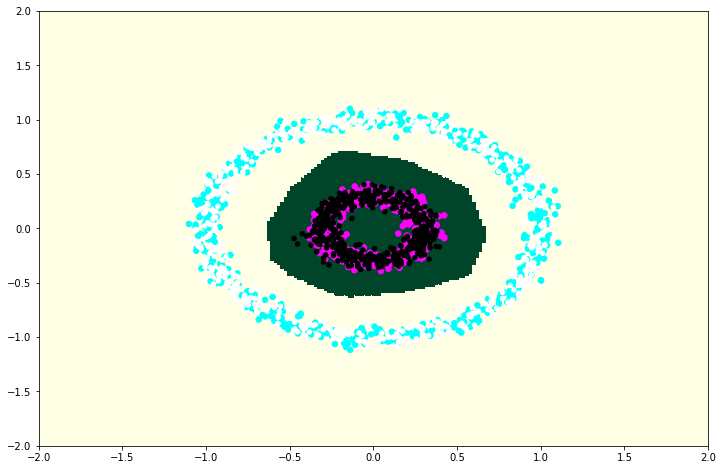

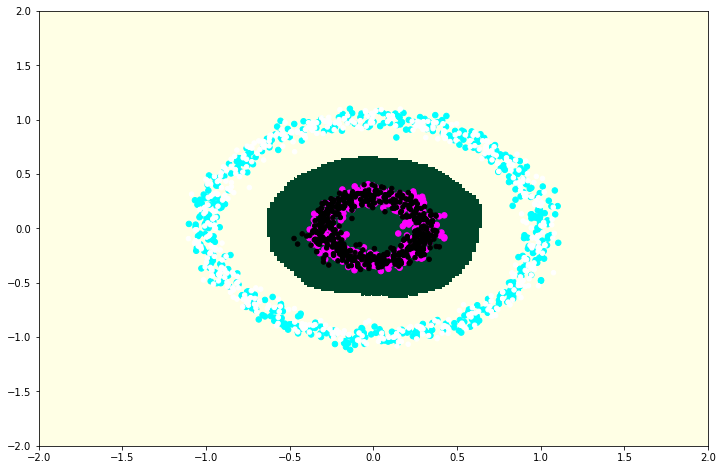

In [166]:
scores_nh = sorted(scores_nh, key=(lambda x: x[2][1]), reverse=False)
plot_scores(scores_nh)

Al contrario de lo visto anteriormente, al utilizar una capa oculta se logra una clasificación totalmente acertada de los datos. Como se puede ver gráficamente, para la clasificación se utilizan divisiones mayoritariamente circulares, las cuales 'encierran' a la clase interior.

**d)** Demuestre **experimentalmente** que stump (árbol de clasificación de 1 nivel) no puede resolver satisfactoriamente el problema anterior. Puede utilizar el criterio y la función de partición que prefiera. Sea convincente: por ejemplo, intente modificar los parámetros de la máquina, reportando métricas que permitan evaluar el desempeño del modelo en el problema con cada cambio efectuado. Adapte también la función *plot_classifier* para que represente gráficamente la solución encontrada por el árbol. Describa y explique lo que observa, reportando gráficos de la solución sólo para algunos casos representativos.

Test Accuracy = 0.659000


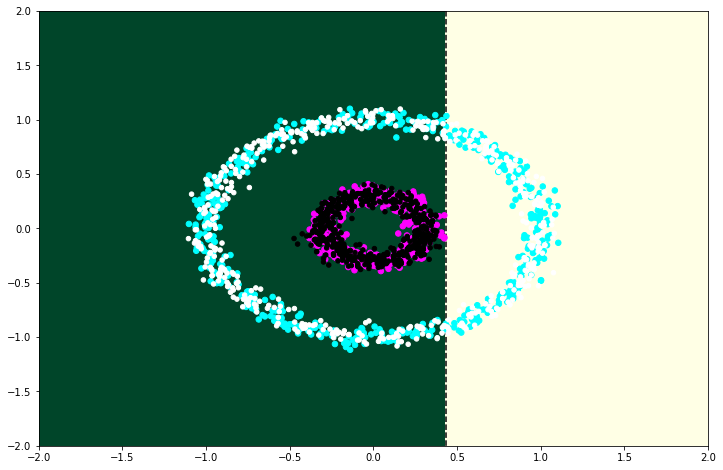

Test Accuracy = 0.676000


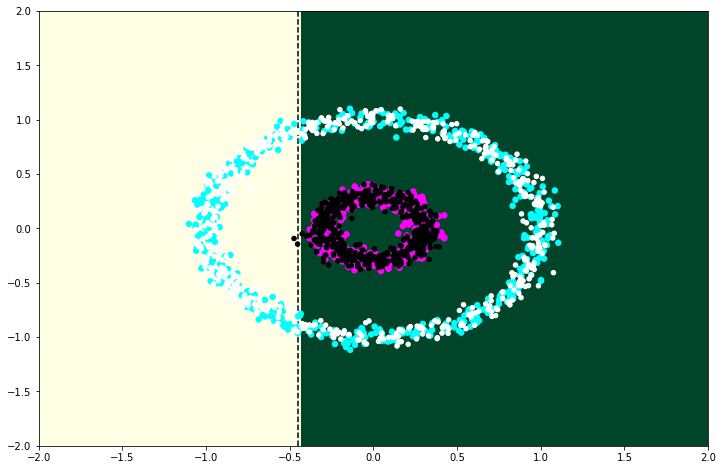

Test Accuracy = 0.659000


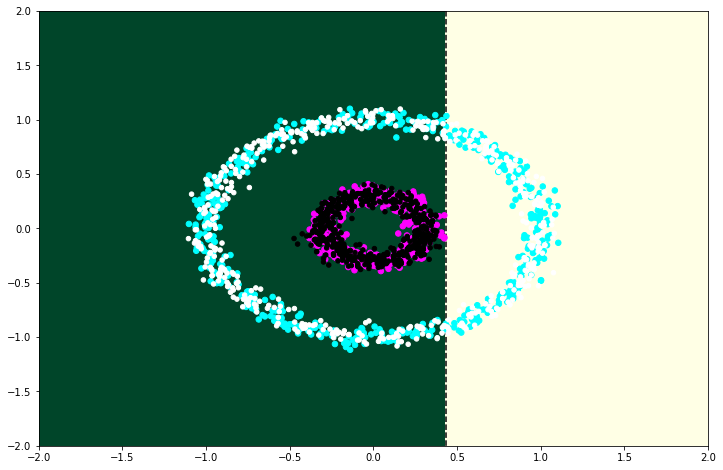

Test Accuracy = 0.676000


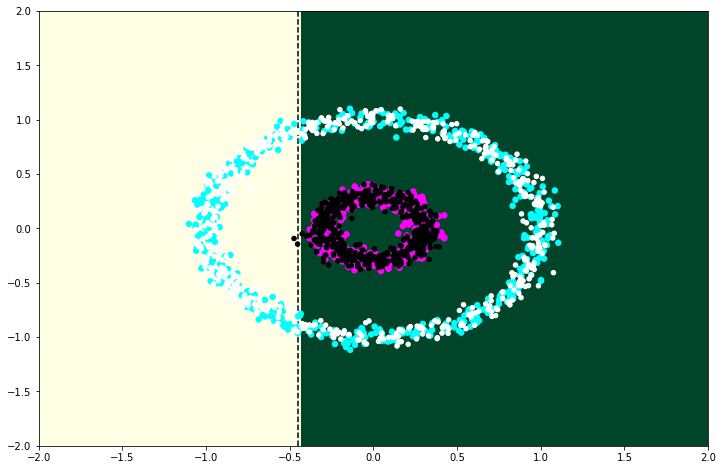

In [167]:
from sklearn.tree import DecisionTreeClassifier
crit=['gini','entropy']
split=['best','random']
sort=[True,False]

for c in crit:
    for s in split:
        clf=DecisionTreeClassifier(criterion=c,splitter=s,random_state=0,max_depth=1,presort=ps)
        clf.fit(X_train,Y_train)
        acc_test = clf.score(X_test,Y_test)
        print("Test Accuracy = %f"%acc_test)
        plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Nuevamente, al tener sólo un nivel, se realiza una sóla división del espacio, resultando en una clasificación lineal, la cual, como se vió previamente, no puede realizar una separación exacta de los datos.

**e)** Demuestre experimentalmente que un árbol de clasificación de múltiples niveles puede resolver satisfactoriamente el problema estudiado. Puede utilizar el criterio y la función de partición que prefiera, pero puede optar tranquilamente por usar los hiper-parámetros que se entregan como referencia en el código de ejemplo. Cambie el número de niveles admitidos en el árbol Nt entre 2 y 20, graficando el error de entrenamiento y pruebas como función de Nt. Describa y explique lo que observa. Utilice la función plot classifier, dise~nada anteriormente, para construir gráficos de la solución en algunos casos representativos.

In [182]:
crit = ['gini','entropy']
sort = [True,False]

scores_dt=[]

for n in range(2,20):
    for c in crit:
        clf=DecisionTreeClassifier(criterion=c,splitter='best',random_state=0,max_depth=n)
        clf.fit(X_train,Y_train)
        acc_train = clf.score(X_train,Y_train)
        acc_test = clf.score(X_test,Y_test)
        scores_dt.append((clf,acc_train,acc_test))

scores_dt

[(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=0,
              splitter='best'), 0.876, 0.85499999999999998),
 (DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=0,
              splitter='best'), 0.876, 0.85499999999999998),
 (DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf

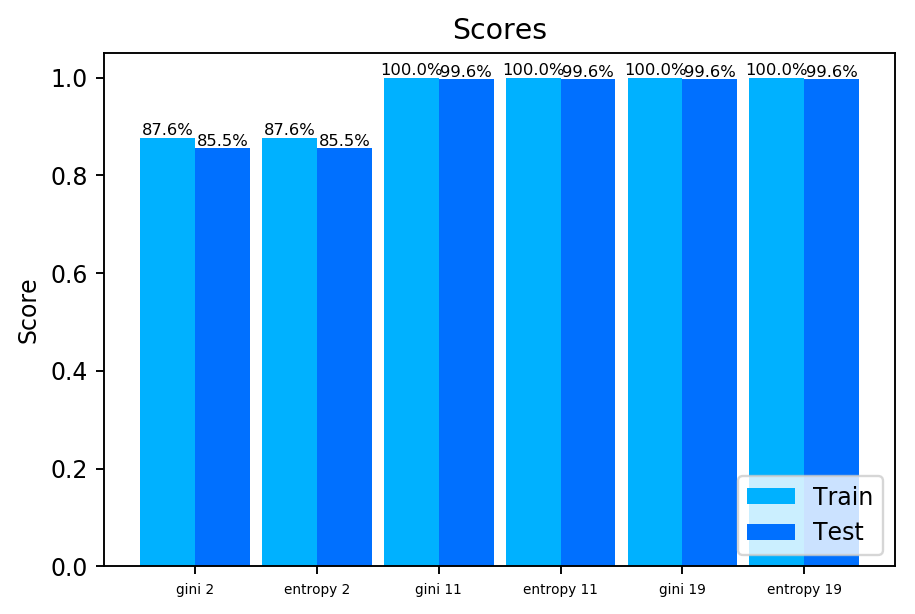

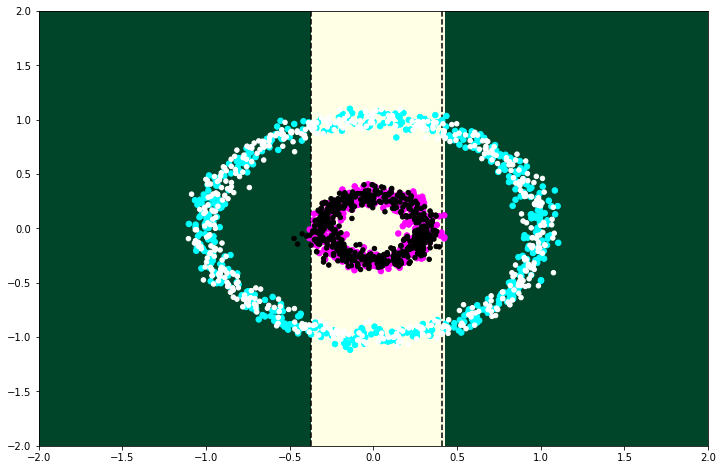

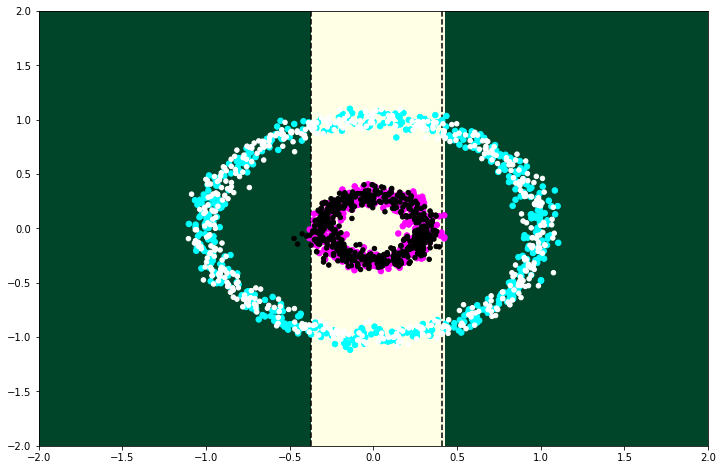

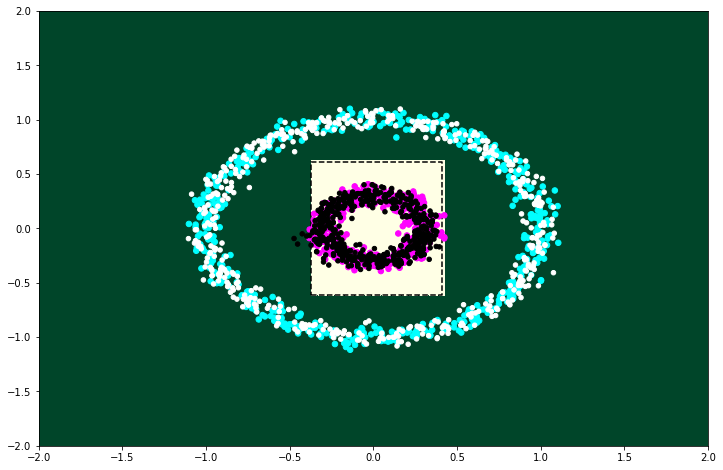

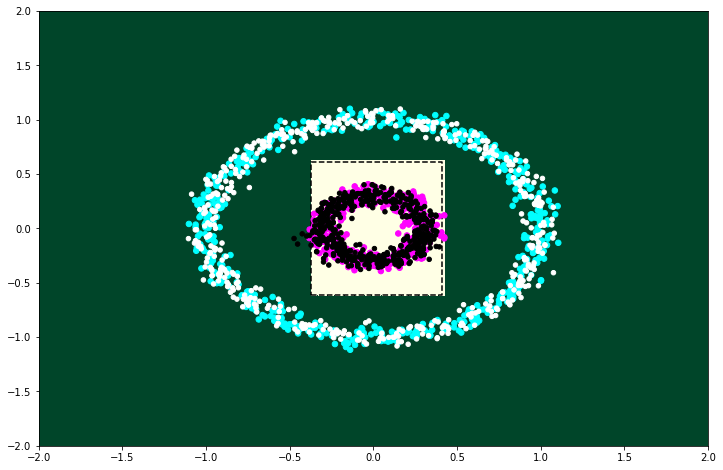

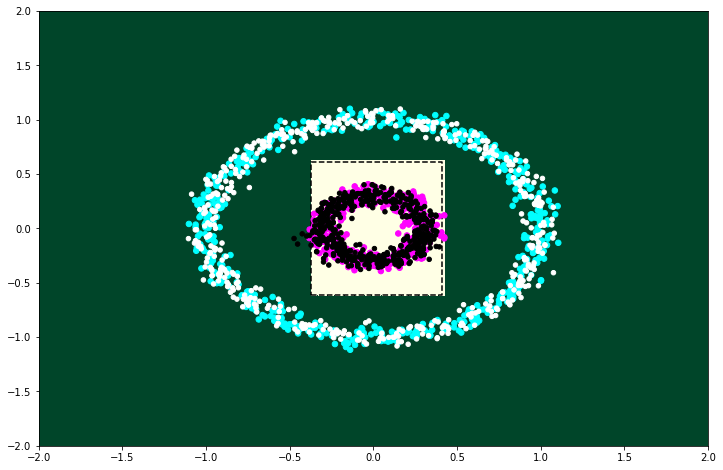

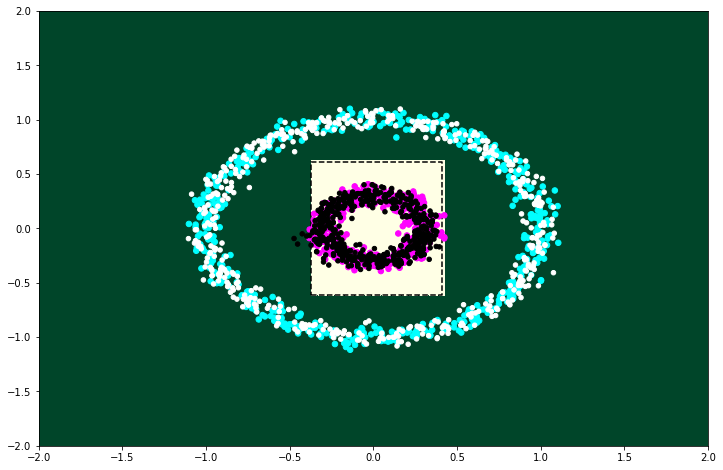

In [190]:
def plot_scores_dt(scores,n=2,title="Scores"):
    count = len(scores)
    models = []
    
    for x in scores[:n]: models.append(x) 
    for x in scores[int(count/2):int(count/2)+n]: models.append(x) 
    for x in scores[-n:]: models.append(x) 
    
    N = len(models)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.45         # the width of the bars

    fig, ax = plt.subplots()

    train_acc = list(m[1] for m in models)
    test_acc = list(m[2] for m in models)

    rects1 = ax.bar(ind, train_acc, width, color='#00b1ff')
    rects1b = ax.bar(ind+width, test_acc, width, color='#0070ff')
    
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(ind + width/2)
    ax.set_xticklabels((m[0].criterion+" "+str(m[0].max_depth) for m in models),fontsize='xx-small')

    ax.legend((rects1[0], rects1b[0]), ('Train', 'Test'), loc='lower right')

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., height,
                    '%.1f%%' % (100*height),
                    ha='center', va='bottom', fontsize='x-small')

    autolabel(rects1)
    autolabel(rects1b)
    fig.set_dpi(170)

    plt.show()
    
    for m in models:
        plot_classifier(m[0],X_train,Y_train,X_test,Y_test,"DecisionTree")
        
scores_dt = sorted(scores_dt, key=(lambda x: x[1]), reverse=False)
plot_scores_dt(scores_dt)

<p  style="text-align: justify;">
    Analisis Cualitativo.
</p>

<p  style="text-align: justify;"> 
    **(f)** Como ya se demostró experimentalmente que este problema es linealmente inseperable, ahora se pide experimentar otra alternativa. Para ello deberá realizar una proyección de los datos a un nuevo espacio dimensional (manifold) en el cual se reconozcan sus patrones no lineales, para poder trabajarlos con fronteras lineales. Utilice la técnica de PCA con la ayuda de un Kernel Gaussiano  para extraer sus vectores con dimensión infinita de mayor varianza.
</p>

In [191]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

<p  style="text-align: justify;">
    Analisis Cualitativo.
</p>


<p  style="text-align: justify;"> 
    **(g)** Ajuste un algoritmo de aprendizaje con fronteras lineal para los datos proyectados en este nuevo espacio que captura sus componentes no lineales, muestre graficamente que el problema ahora puede ser resulto con estos métodos. Reporte métricas para evaluar el desempeño, comente y concluya.
</p>

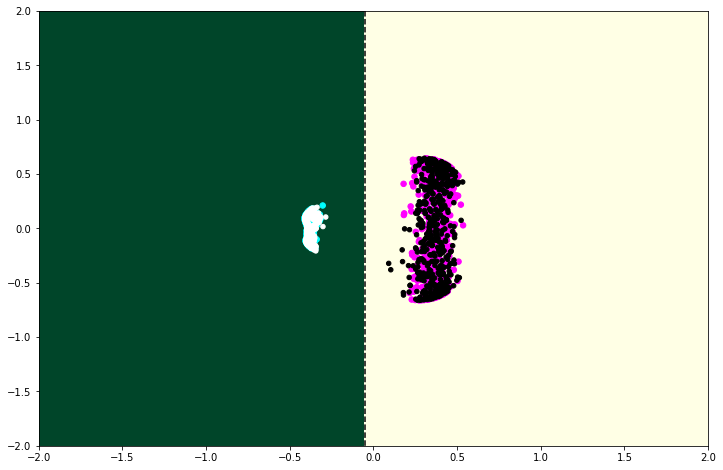

In [194]:
Tree = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
Tree.fit(Xkpca_train, Y_train)
plot_classifier(Tree,Xkpca_train,Y_train,Xkpca_test,Y_test,"DecisionTree")

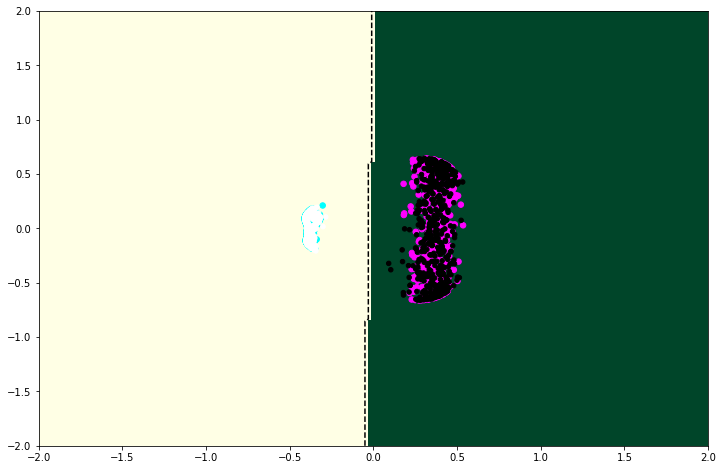

In [195]:
LR = LogisticRegression(C=100, penalty='l2', tol=0.01)
LR.fit(Xkpca_train, Y_train)
plot_classifier(LR,Xkpca_train,Y_train,Xkpca_test,Y_test,"LogisticRegression")

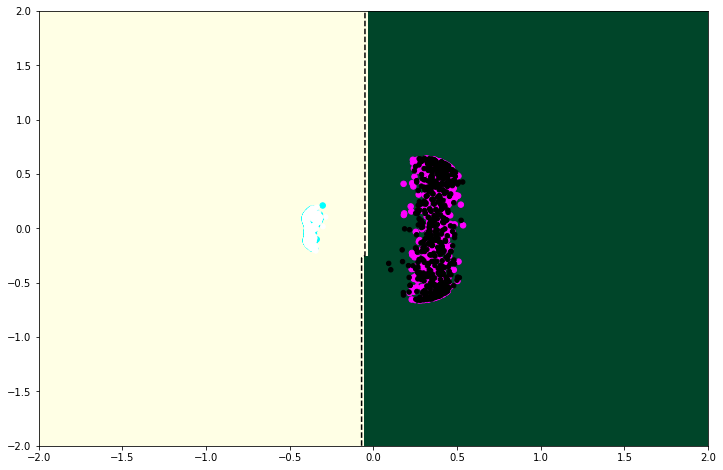

In [196]:
model_SVM = SVM(kernel='linear')
model_SVM.fit(Xkpca_train,Y_train)
plot_classifier(model_SVM,Xkpca_train,Y_train,Xkpca_test,Y_test,"SVM")